## 3rd simple user case study example
This time use the upper case version of the classification data, as lower cases caused issues on the first.
And we look for a case study in which the firm only has one IPC class allocated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
!ls -l *.dta

-rw-r--r--@ 1 ahuxor  staff   51973915  4 Aug  2010 assignee.dta
-rwxr-xr-x@ 1 ahuxor  staff  236509670 28 Mar  2009 cite76_06.dta
-rwxr-xr-x@ 1 ahuxor  staff   56791108 17 Aug  2013 orig_gen_76_06.dta
-rw-r--r--@ 1 ahuxor  staff  364030957  4 Aug  2010 pat76_06_assg.dta
-rw-r--r--@ 1 ahuxor  staff  252609858  4 Aug  2010 pat76_06_ipc.dta
-rw-r--r--@ 1 ahuxor  staff  263827184  7 Apr  2008 patassg.dta


In [3]:
# read in main data, with ipc classes etc.
pat76_06_ipc_df = pd.read_stata('pat76_06_ipc.dta')


In [4]:
# convert any IPC casses to upper case if any lower case
icl_uc = pat76_06_ipc_df.icl.apply(lambda x: x.upper())
icl_class_uc = pat76_06_ipc_df.icl_class.apply(lambda x: x.upper())

pat76_06_ipc_df['icl_uc'] = icl_uc
pat76_06_ipc_df['icl_class_uc'] = icl_class_uc

In [5]:
pat76_06_ipc_df.head().T

,0,1,2,3,4
appyear,1974,1974,1975,1975,1974
cat,6,6,6,6,5
gyear,1976,1976,1976,1976,1976
icl,A41D 1900,A47D 701,A47D 702,A47C 2100,B63B 708
icl_class,A41D,A47D,A47D,A47C,B63B
icl_maingroup,19,7,7,21,7
iclnum,1,1,1,2,1
nclass,2,5,5,5,114
numipc,1,1,2,2,1
patent,3930271,3930272,3930273,3930273,3930274


In [6]:
# create new column for the IPC section letter of the classification
pat76_06_ipc_df['section'] = pat76_06_ipc_df['icl_class_uc'].astype(str).str[0]

pat76_06_ipc_G_section_df =pat76_06_ipc_df[pat76_06_ipc_df.section == 'G']



In [75]:
len(pat76_06_ipc_G_section_df)

973570

In [82]:
# any way to get any patent that has both a G section and a non-G section?
# go through patents in G section from above selection, but look at all data to see if any 

for z in range(0,100):
    # get a patent number
    temp_pat_num = pat76_06_ipc_G_section_df.patent.values[z]
    # for this number get datafro=ame from original ipc datafile
    all_sections = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent == temp_pat_num].section.values.tolist()))
    if 'A' in all_sections:
        print('init patent = ',temp_pat_num)
        print(all_sections)
        print('.....')


yes, A
init patent =  3930321
['A', 'G']
.....
yes, A
init patent =  3930504
['A', 'G']
.....
yes, A
init patent =  3930722
['A', 'G']
.....


In [87]:
# load data with citation and claim numbers
pat76_06_assg_df = pd.read_stata('pat76_06_assg.dta')



In [139]:
%%time
# any way to get any patent that has both a G section and a non-G section?
# go through patents in G section from above selection, but look at all data to see if any 

list_patents = []
list_of_list_sections = []
list_num_citations = []
list_num_claims = []
list_num_sections = []
list_of_list_assignees = []
for z in range(0,100000):
    # get a patent number
    temp_pat_num = pat76_06_ipc_G_section_df.patent.values[z]
    # for this number get datafro=ame from original ipc datafile
    all_sections = list(set(pat76_06_ipc_df[pat76_06_ipc_df.patent == temp_pat_num].section.values.tolist()))
    # sort section lists to ease readability (human)
    all_sections.sort()
    #print('patent = ',temp_pat_num)
    list_patents.append(temp_pat_num)
    #print(all_sections)
    list_of_list_sections.append(all_sections)
    xx = pat76_06_assg_df[pat76_06_assg_df.patent==temp_pat_num]
    num_cites = xx.allcites.values[0]
    #print('cites = ',num_cites)
    list_num_citations.append(num_cites)
    num_claims = xx.nclaims.values[0]
    #print('claims = ', num_claims)
    list_num_claims.append(num_claims)
    num_sections = len(all_sections)
    #print(num_sections)
    list_num_sections.append(num_sections)
    assignee_list = xx.pdpass.values[0]
    list_of_list_assignees.append(assignee_list)

new_df = pd.DataFrame({
    'patent': list_patents,
    'sections': list_of_list_sections,
    'citations': list_num_citations,
    'claims': list_num_claims,
    'num_sections': list_num_sections,
    'assignees': list_of_list_assignees
    })

print(new_df.tail())

       assignees  citations  claims  num_sections   patent sections
99995        NaN          9     6.0             1  4386341      [G]
99996        NaN          7     5.0             1  4386342      [G]
99997        NaN          7     5.0             1  4386342      [G]
99998        NaN         12     9.0             1  4386343      [G]
99999        NaN          9    15.0             1  4386344      [G]
CPU times: user 17min 26s, sys: 2min 2s, total: 19min 28s
Wall time: 19min 46s


In [134]:
# explore those with only one section. Are many from NaN
new_df_lone = new_df[new_df.assignees.isnull()]
new_df_firm = new_df[new_df.assignees.notnull()]

       assignees    citations       claims  num_sections        patent
count        0.0  1498.000000  1498.000000   1498.000000  1.498000e+03
mean         NaN     8.672230     9.509346      1.138184  3.954550e+06
std          NaN    10.315402     8.331571      0.367697  1.418267e+04
min          NaN     0.000000     1.000000      1.000000  3.930321e+06
25%          NaN     3.000000     4.000000      1.000000  3.941505e+06
50%          NaN     6.000000     8.000000      1.000000  3.955238e+06
75%          NaN    11.000000    12.000000      1.000000  3.967256e+06
max          NaN   124.000000   140.000000      3.000000  3.978723e+06
          assignees    citations       claims  num_sections        patent
count  8.502000e+03  8502.000000  8502.000000   8502.000000  8.502000e+03
mean   1.024619e+07    10.430957    10.559045      1.155728  3.954306e+06
std    4.130555e+05    13.618169     9.119176      0.376622  1.405524e+04
min    1.003033e+07     0.000000     1.000000      1.000000  3.93

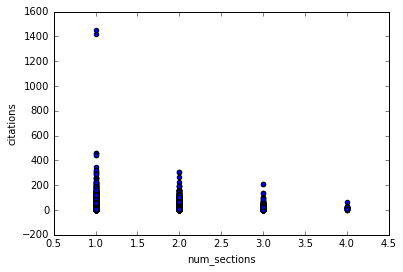

In [120]:
new_df.plot.scatter('num_sections','citations')

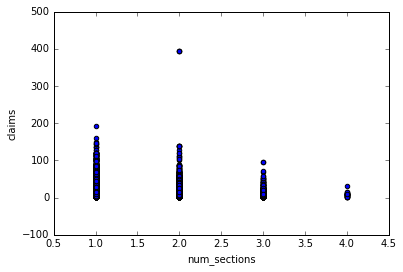

In [121]:
new_df.plot.scatter('num_sections','claims')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x151e6a1d0>]], dtype=object)

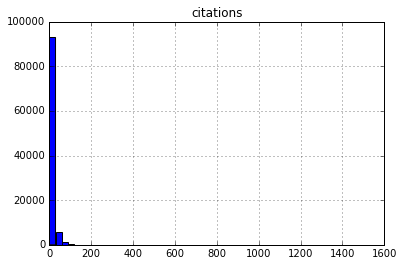

In [124]:
new_df.hist('citations',bins=50)

In [69]:

pat76_06_ipc_df[pat76_06_ipc_df.patent.values==3954663].T

,34811,34812,34813,34814,34815,34816
appyear,1973,1973,1973,1973,1973,1973
cat,3,3,3,3,3,3
gyear,1976,1976,1976,1976,1976,1976
icl,C09K 300,G01N 3100,G01N 3316,C12K 104,A61K 3556,A61K 3152
icl_class,C09K,G01N,G01N,C12K,A61K,A61K
icl_maingroup,3,31,33,1,35,31
iclnum,1,2,3,4,5,6
nclass,435,435,435,435,435,435
numipc,6,6,6,6,6,6
patent,3954663,3954663,3954663,3954663,3954663,3954663


# plot of relative proportions of each section
# First eliminate 
pat76_06_ipc_df_dropdupes = pat76_06_ipc_df_valid.drop_duplicates('patent')
pat76_06_ipc_df_dropdupes_valid = pat76_06_ipc_df[(pat76_06_ipc_df.section == 'A') | \
                                        (pat76_06_ipc_df.section == 'B') | \
                                       (pat76_06_ipc_df.section == 'C') | \
                                       (pat76_06_ipc_df.section == 'D') | \
                                       (pat76_06_ipc_df.section == 'E') | \
                                       (pat76_06_ipc_df.section == 'F') | \
                                       (pat76_06_ipc_df.section == 'G') | \
                                       (pat76_06_ipc_df.section == 'H')]
pat76_06_ipc_df_dropdupes_valid.section.value_counts().plot(kind='barh', rot=0)
plt.savefig("/Users/ahuxor/MSc/Thesis_Project/msc_thesis/Figs/ipc_sections_barplot.pdf", bbox_inches = 'tight')



In [8]:
pat76_06_ipc_G_section_df.head().T

,65,69,77,78,125
appyear,1974,1975,1974,1974,1974
cat,6,6,6,6,6
gyear,1976,1976,1976,1976,1976
icl,G01C 1902,G09B 306,G09D 306,G09F 708,G04C 2116
icl_class,G01C,G09B,G09D,G09F,G04C
icl_maingroup,19,3,3,7,21
iclnum,1,1,1,1,1
nclass,33,434,40,40,368
numipc,1,2,1,1,1
patent,3930317,3930321,3930326,3930327,3930358


In [9]:
# create a new df in which duplicates -- only in icl_class and patent -- are removed
# if later want to use full icl, then must not do this step.
pat76_06_ipc_G_section_df_dupless = pat76_06_ipc_G_section_df.drop_duplicates(['icl_class_uc','patent'])

In [10]:
print(len(pat76_06_ipc_df))
len(pat76_06_ipc_G_section_df_dupless)

4857833


794593

In [11]:
pat76_06_ipc_G_section_df_dupless[100110:100115]

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee,icl_uc,icl_class_uc,section
826374,1983,2.0,1984,G01V 138,G01V,1.0,1,367.0,1,4486863,10586863.0,21.0,15.0,568450.0,G01V 138,G01V,G
826375,1981,2.0,1984,G01V 138,G01V,1.0,1,367.0,1,4486864,10266734.0,21.0,23.0,508865.0,G01V 138,G01V,G
826376,1981,2.0,1984,G01V 136,G01V,1.0,1,367.0,1,4486865,10190949.0,21.0,24.0,381140.0,G01V 136,G01V,G
826377,1981,2.0,1984,G01V 120,G01V,1.0,1,367.0,2,4486866,10228403.0,21.0,39.0,101491.0,G01V 120,G01V,G
826379,1982,2.0,1984,G01S 752,G01S,7.0,1,367.0,1,4486867,10237497.0,21.0,87.0,466005.0,G01S 752,G01S,G


In [12]:
### start looking at final example
#get a typical patent 
#a_patent = pat76_06_ipc_df[4002:4003].patent.values[0]
a_patent = 4486867 # use one we know has 2 classes attached
a_patent

4486867

In [13]:
# get all icl_classes involved in this patent
classes = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==a_patent].icl_class_uc.values.tolist()
classes

['G01S']

In [14]:
# get list of all icl_class_uc available 
section_G_icl_classes = pat76_06_ipc_G_section_df_dupless.icl_class_uc.unique().tolist()

In [15]:
# Need to create new data structures aggregating icl_classes for each patent number
pat76_06_ipc_G_section_df_dupless.head().T

,65,69,77,78,125
appyear,1974,1975,1974,1974,1974
cat,6,6,6,6,6
gyear,1976,1976,1976,1976,1976
icl,G01C 1902,G09B 306,G09D 306,G09F 708,G04C 2116
icl_class,G01C,G09B,G09D,G09F,G04C
icl_maingroup,19,3,3,7,21
iclnum,1,1,1,1,1
nclass,33,434,40,40,368
numipc,1,2,1,1,1
patent,3930317,3930321,3930326,3930327,3930358


In [16]:
# get list of (unique) patents
all_patents = pat76_06_ipc_G_section_df_dupless.patent.values
all_patents[0]

3930317

In [17]:
%%time
list_of_patents = []
list_of_list_of_classes = []

for j in range(0,100000):
    a_patent = all_patents[j]
    list_of_patents.append(a_patent)
    list_of_classes = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent == a_patent].icl_class_uc.values
    list_of_list_of_classes.append(list_of_classes)

CPU times: user 2min 58s, sys: 2.14 s, total: 3min
Wall time: 3min 4s


In [17]:
%%time
# as above, but for the single letter section
list_of_patents_section = []
list_of_list_of_sections = []

for j in range(0,100000):
    a_patent = all_patents[j]
    list_of_patents.append(a_patent)
    list_of_sections = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent == a_patent].section.values
    list_of_list_of_sections.append(list_of_sections)

CPU times: user 2min 58s, sys: 2.14 s, total: 3min
Wall time: 3min 4s


In [18]:
len(list_of_list_of_classes)

100000

In [19]:
temp_dict = dict( patent = list_of_patents, icl_classes = list_of_list_of_classes )
df = pd.DataFrame.from_dict(temp_dict, orient='index').T

In [20]:
# cannot use drop_duplicates on icl_classes contains a list, so drop on patent
df1=df.drop_duplicates(['patent'])
df1.tail(10)

,icl_classes,patent
99987,"[G03F, G03C]",4486518
99989,[G03G],4486519
99990,[G03G],4486520
99991,[G03G],4486521
99992,[G03G],4486522
99993,[G03G],4486523
99994,[G03G],4486524
99995,[G03G],4486525
99996,"[G03C, G03F]",4486526
99998,"[G03C, G01D]",4486527


In [21]:
# get example patent
a_patent = 4486867
zz = pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==a_patent].icl_class_uc.values
zz1 = zz.tolist()
zz1

['G01S']

In [22]:
pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==a_patent].T

,826379
appyear,1982
cat,2
gyear,1984
icl,G01S 752
icl_class,G01S
icl_maingroup,7
iclnum,1
nclass,367
numipc,1
patent,4486867


In [23]:
# find others with exactly the same classes

exact_match = df1[(df1['icl_classes'].astype(str).str.contains('G01S')) ]

In [37]:
# find others with exactly the same classes

exact_match_section = df1[(df1['section'].astype(str).str.contains('G')) ]

KeyError: 'section'

In [24]:
print(len(exact_match))
exact_match.icl_classes[950:1000]

2168


32951                      [G01S]
33117                      [G01S]
33127                [G08B, G01S]
33129                      [G01S]
33130                      [G01S]
33273                      [G01S]
33274                      [G01S]
33275                      [G01S]
33343                [G01P, G01S]
33475                      [G01S]
33476                      [G01S]
33477                      [G01S]
33478                      [G01S]
33479                      [G01S]
33542                      [G01S]
33615                      [G01S]
33779                [G01S, G08B]
33781                      [G01S]
33782                      [G01S]
33784                      [G01S]
33785                      [G01S]
33955                [G08G, G01S]
33957                [G01S, G08B]
33964                      [G01S]
33965                      [G01S]
33966                      [G01S]
33967                      [G01S]
33968                      [G01S]
33969                      [G01S]
34121         

In [25]:
# find others with exactly the same classes

exact_match = df1[(df1['icl_classes'].astype(str).str.contains('G01S')) & \
                 (df1['icl_classes'].astype(str).str.contains('G08B'))]

In [26]:
exact_match_patents = exact_match.patent.values.tolist()
exact_match_patents

[3932871,
 3942178,
 3955171,
 3976988,
 3983558,
 3995269,
 4021807,
 4023155,
 4027303,
 4035798,
 4041495,
 4051472,
 4079375,
 4081785,
 4117464,
 4124848,
 4128834,
 4129856,
 4134110,
 4134538,
 4135190,
 4187501,
 4195289,
 4197537,
 4295131,
 4319349,
 4322722,
 4349823,
 4358759,
 4358764]

In [27]:
c = [10,10,4,7,13,3,4,6,7,12,10,8,10]
np.mean(c)

8.0

In [36]:
# find others with different section

exact_match = df1[(df1['section'].astype(str).str.contains('G')) & \
                 (df1['section'].astype(str).str.contains('H'))]

KeyError: 'section'

In [28]:
pat76_06_ipc_G_section_df_dupless[pat76_06_ipc_G_section_df_dupless.patent==3936791].T

,9460,9461
appyear,1973,1973
cat,2,2
gyear,1976,1976
icl,G01N 2904,G01S 966
icl_class,G01N,G01S
icl_maingroup,29,9
iclnum,1,2
nclass,367,367
numipc,2,2
patent,3936791,3936791


# start on co-occurrence matrix and cosine similarity

In [29]:
# create list for unique_icl_class, rather than numpy array
unique_icl_class = pat76_06_ipc_G_section_df_dupless.icl_class_uc.unique()
unique_icl_class_list = sorted(unique_icl_class.tolist())

unique_icl_class_list

['G 1B',
 'G00',
 'G00B',
 'G00C',
 'G00F',
 'G00G',
 'G00J',
 'G00K',
 'G00N',
 'G00T',
 'G00V',
 'G01',
 'G01A',
 'G01B',
 'G01C',
 'G01D',
 'G01E',
 'G01F',
 'G01G',
 'G01H',
 'G01I',
 'G01J',
 'G01K',
 'G01L',
 'G01M',
 'G01N',
 'G01O',
 'G01P',
 'G01Q',
 'G01R',
 'G01S',
 'G01T',
 'G01U',
 'G01V',
 'G01W',
 'G01Y',
 'G01Z',
 'G02',
 'G02?',
 'G02A',
 'G02B',
 'G02C',
 'G02D',
 'G02E',
 'G02F',
 'G02G',
 'G02H',
 'G02I',
 'G02J',
 'G02K',
 'G02L',
 'G02M',
 'G02N',
 'G02P',
 'G02R',
 'G02S',
 'G02T',
 'G02V',
 'G03',
 'G03A',
 'G03B',
 'G03C',
 'G03D',
 'G03E',
 'G03F',
 'G03G',
 'G03H',
 'G03J',
 'G03K',
 'G03L',
 'G03M',
 'G03N',
 'G03O',
 'G03P',
 'G03Q',
 'G03R',
 'G03S',
 'G03T',
 'G04B',
 'G04C',
 'G04D',
 'G04E',
 'G04F',
 'G04G',
 'G04H',
 'G04J',
 'G04K',
 'G04L',
 'G04M',
 'G04N',
 'G04P',
 'G04Q',
 'G04R',
 'G04S',
 'G04V',
 'G05',
 'G058',
 'G05B',
 'G05C',
 'G05D',
 'G05E',
 'G05F',
 'G05G',
 'G05H',
 'G05I',
 'G05J',
 'G05K',
 'G05L',
 'G05N',
 'G05O',
 'G05P',
 'G05Q

In [30]:
# create list for patents, 
unique_patents = pat76_06_ipc_G_section_df_dupless.patent.unique()
unique_patents_list = sorted(unique_patents.tolist())
unique_patents_list

[3930317,
 3930321,
 3930326,
 3930327,
 3930358,
 3930359,
 3930360,
 3930361,
 3930362,
 3930363,
 3930397,
 3930398,
 3930399,
 3930400,
 3930401,
 3930402,
 3930403,
 3930404,
 3930405,
 3930406,
 3930407,
 3930408,
 3930409,
 3930410,
 3930411,
 3930412,
 3930413,
 3930414,
 3930427,
 3930429,
 3930430,
 3930431,
 3930459,
 3930466,
 3930504,
 3930512,
 3930546,
 3930556,
 3930560,
 3930561,
 3930581,
 3930601,
 3930610,
 3930611,
 3930612,
 3930613,
 3930653,
 3930654,
 3930700,
 3930711,
 3930712,
 3930713,
 3930714,
 3930715,
 3930716,
 3930717,
 3930718,
 3930719,
 3930720,
 3930721,
 3930722,
 3930723,
 3930724,
 3930725,
 3930726,
 3930727,
 3930728,
 3930729,
 3930730,
 3930732,
 3930733,
 3930734,
 3930735,
 3930736,
 3930764,
 3930775,
 3930798,
 3930850,
 3930851,
 3930852,
 3930853,
 3930854,
 3930855,
 3930856,
 3930857,
 3930858,
 3930859,
 3930860,
 3930861,
 3930862,
 3930863,
 3930864,
 3930865,
 3930866,
 3930867,
 3930868,
 3930869,
 3930891,
 3930892,
 3930918,


In [31]:
feature_vectors_df = pd.DataFrame({'icl_class' : unique_icl_class})
feature_vectors_df.head()

,icl_class
0,G01C
1,G09B
2,G09D
3,G09F
4,G04C


In [32]:
# TRYING TO PROFILE
# TRY TO ONLY USE LISTS, TO THE VERY END
# now try and get vectors for each assignee of the number of patents they hold in each icl_class

# create final dataframe to hold results, starting with all classes as first column
# num = number of patents to look at
def get_patent_class_counts_for_assignees(num):
    feature_vectors_listoflists =[]
    # first get list of (unique) assignees (try first five first to test code)
    range_of_assignees = unique_assignees[0:num]
    # then for each one of them, 
    for assignee in range_of_assignees:
        # look at all the patent classes each assignee has
        temp = pat76_06_assg_df_valid_pdpass[pat76_06_assg_df_valid_pdpass.pdpass==assignee].icl_class
        icl_codes_in_current_list = list(temp.values)
        #  and count instances of these if multiple instances of any 
        n = len(unique_icl_class)
        icl_codes_per_assignee_list = []
        for m in range(0,n):
            current_icl_class = unique_icl_class_list[m]
            counted = icl_codes_in_current_list.count(current_icl_class)
            icl_codes_per_assignee_list.append(counted)
            col_name_used = assignee.astype(str)
        #feature_vectors_df[col_name_used]=icl_codes_per_assignee_vector
        feature_vectors_listoflists.append((icl_codes_per_assignee_list))
    return(feature_vectors_listoflists)

In [33]:
# create co-occurrence matrix for patents
# start with small sample before 'for a_patent in unique_patents_list
# each patent starts with a list of zeros, which are swithed to a 'one' if class is given to it.
for i in range(0,5):
    print('pat num = ',unique_patents_list[i])


pat num =  3930317
pat num =  3930321
pat num =  3930326
pat num =  3930327
pat num =  3930358


In [34]:
pat76_06_ipc_G_section_df_dupless.head()

,appyear,cat,gyear,icl,icl_class,icl_maingroup,iclnum,nclass,numipc,patent,pdpass,subcat,subclass,uspto_assignee,icl_uc,icl_class_uc,section
65,1974,6.0,1976,G01C 1902,G01C,19.0,1,33.0,1,3930317,10036902.0,69.0,318.0,597185.0,G01C 1902,G01C,G
69,1975,6.0,1976,G09B 306,G09B,3.0,1,434.0,2,3930321,NaN,69.0,334.0,0.0,G09B 306,G09B,G
77,1974,6.0,1976,G09D 306,G09D,3.0,1,40.0,1,3930326,NaN,69.0,114.0,0.0,G09D 306,G09D,G
78,1974,6.0,1976,G09F 708,G09F,7.0,1,40.0,1,3930327,10030327.0,69.0,620.0,52740.0,G09F 708,G09F,G
125,1974,6.0,1976,G04C 2116,G04C,21.0,1,368.0,1,3930358,10446448.0,69.0,257.0,218550.0,G04C 2116,G04C,G


In [35]:
# should be able to use get_dummy
pat76_06_ipc_G_section_df[['patent','icl_class_uc']]

,patent,icl_class_uc
65,3930317,G01C
69,3930321,G09B
77,3930326,G09D
78,3930327,G09F
125,3930358,G04C
126,3930359,G04F
128,3930360,G04B
129,3930361,G04B
130,3930361,G04B
131,3930362,G04B
